In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', skiprows=59)
df = df.T
df.columns = df.iloc[0]
df.drop('Class', inplace=True)
df['class'] = df.index
df['class'] = df['class'].apply(lambda x: x[0])
df.set_index('ID_REF', inplace=True)
df

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,class
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,10.742427,7.270560667,...,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612,H
GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,9.865655308,4.810194735,...,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691,H
GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,10.148454,7.822844272,...,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396,H
GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,10.87991277,5.690417407,...,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612,H
GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,10.09052505,7.089369391,...,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,5.375997385,6.133231971,...,5.942308,7.290514,8.988511,5.567947,5.55878,5.429437,4.48794,4.254286,5.375811,M
GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,9.613538724,3.89680742,...,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.88208,3.744138,M
GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,9.312493837,5.545193595,...,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536,M



### a. High level description of the data and some pre-processing

1) How many genes profiled?

In [4]:
num_genes = df.shape[1] - 1
print(f'There are {num_genes} genes were profiled.')

There are 54675 genes were profiled.


2) How many samples (subjects/patients) in total?

In [5]:
num_samples = df.shape[0]
print(f'There were {num_samples} subjects in the study.')

There were 99 subjects in the study.


3) How many samples in each class?

In [6]:
num_of_class_h = len(df[df['class'] == 'H'])
print(f'There are {num_of_class_h} healthy samples (class = H). The rest ({num_samples - num_of_class_h}) have Myocardial Infraction.')

There are 50 healthy samples (class = H). The rest (49) have Myocardial Infraction.


4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [7]:
df.dropna(axis=1, inplace=True)
print(f"There were {num_genes-df.shape[1] -1} genes with missing values. After dropping, we're left with {df.shape[1] -1} genes.")
num_genes = df.shape[1] -1

There were 45 genes with missing values. After dropping, we're left with 54628 genes.


5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

TypeError: Horizontal orientation requires numeric `x` variable.

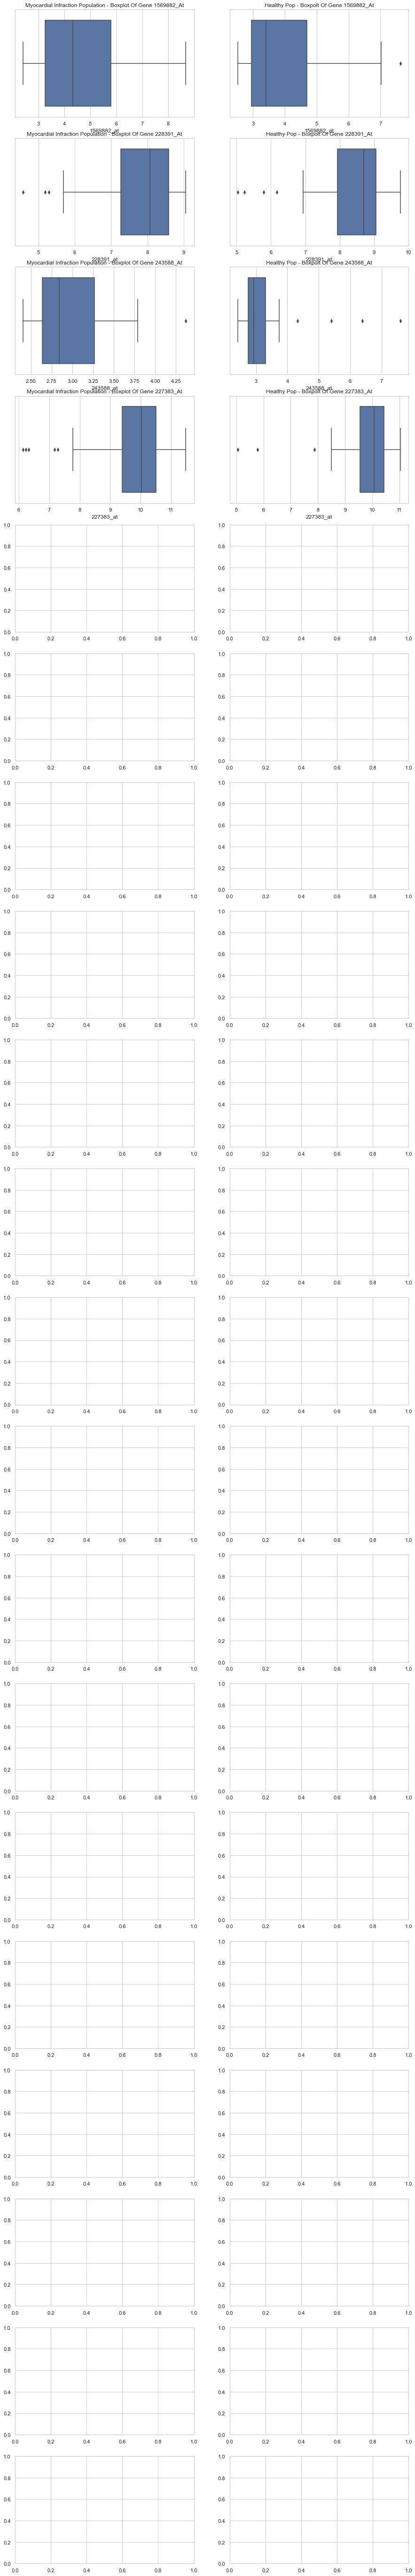

In [8]:
df_h = df[df['class'] == 'H']
df_m = df[df['class'] == 'M']
num_sampled_genes = 20

random_indices = np.random.randint(low=1, high=df.shape[1] - 1, size=num_sampled_genes)

fig, ax = plt.subplots(num_sampled_genes, 2, figsize=(15, 5 * num_sampled_genes))
for ax_ind, i in enumerate(random_indices):
    gene = df.columns[i]
    ax0 = sns.boxplot(df_m.iloc[:, i], ax=ax[ax_ind, 0])
    ax1 = sns.boxplot(df_h.iloc[:, i], ax=ax[ax_ind, 1])
    ax0.set_title(f'myocardial infraction population - boxplot of gene {gene}'.title())
    ax1.set_title(f'healthy pop - boxpolt of gene {gene}'.title())

### WRS for differential expression(DE)

1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

In [9]:
n = len(df)
b = len(df[df['class'] == 'M'])
mu = b * ((n + 1) / 2)
print(f"The expected rank sum is {int(mu)}")

The expected rank sum is 2450


2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

In [10]:
c = sum([i for i in range(n - b + 1, n + 1)])
print(f"The maximal value will be achieved if all of the top ranks would be from the M population. In this case {c}")

The maximal value will be achieved if all of the top ranks would be from the M population. In this case 3675


3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

In [11]:
num_combs = math.comb(n, b)
p_c = 1 / num_combs
print(f"There is only one combination in which the the rank sum equals the maximal rank sum, hence the probability is 1/all possible combinations: {p_c:.3}")

There is only one combination in which the the rank sum equals the maximal rank sum, hence the probability is 1/all possible combinations: 1.98e-29


4) Under the null model,what is the probability of RS(g)=c-1? what is the probability of RS(g) = c-2?
(Provide formulas and explain them)


To calculate $RS(g) = c-1$, we'll examine the number of different combinations that result in $c-1$. We can see that there is, again, only one combination here - M will occupy rank 50 and all of ranks from 52 to 99. Meaning, the probability will be the same as the probability for $RS(g) = c$.

We'll do the same for $RS(g) = c-2$ and find two different option: if M will occupy the 49th spot and ranks 52-99, we'll reach that conclusion. Also, M can occupy ranks 53-99 and the 50th and 51st spot. Meaning, the probaility is:

In [12]:
print(f"{2/num_combs:.3}")

3.96e-29


5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

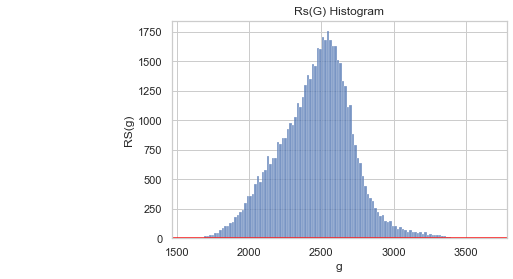

In [13]:
rss = [df[df.columns[i]].rank()[df['class'] == 'M'].sum() for i in range(num_genes + 1)]
iqr = st.iqr(rss)
sf, ax = plt.subplots(1)
sns.histplot(rss)
ax.annotate("IQR", xy=(iqr, 0.25 + 0.02), color='black', fontsize=14)
ax.axhline(y=0.25, color='red')
plt.ylabel("RS(g)")
plt.xlabel("g")
plt.title("RS(g) Histogram".title())
plt.show()

### c. DifferentialExpression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

In [14]:
# WRS
wrs_p_vals_m_over_h = [st.ranksums(df[df.columns[i]][df['class'] == 'M'], df[df.columns[i]][df['class'] == 'H'], alternative='greater')[1] for i in range(num_genes)]
wrs_p_vals_m_over_h = [i for i in wrs_p_vals_m_over_h if i <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_m_over_h)} genes in which M > H at a p-value better than 0.07")
wrs_p_vals_h_over_m = [st.ranksums(df[df.columns[i]][df['class'] == 'H'], df[df.columns[i]][df['class'] == 'M'], alternative='greater')[1] for i in range(num_genes)]
wrs_p_vals_h_over_m = [i for i in wrs_p_vals_h_over_m if i <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_m_over_h)} genes in which M < H at a p-value better than 0.07")
#  alternative='greater'

Under WRS test, there are 10764 genes in which M > H at a p-value better than 0.07
Under WRS test, there are 10764 genes in which M < H at a p-value better than 0.07


In [ ]:
# Student T-Test
t_p_vals_h_over_m = [st.ttest_ind(df[df.columns[i]][df['class']== 'H'], df[df.columns[i]][df['class']== 'M'], alternative='greater')[1] for i in range(num_genes)]
wrs_p_vals_m_over_h = [i for i in wrs_p_vals_m_over_h if i <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_m_over_h)} genes in which M > H at a p-value better than 0.07")
wrs_p_vals_h_over_m = [st.ranksums(df[df.columns[i]][df['class'] == 'M'], df[df.columns[i]][df['class'] == 'M'], alternative='greater')[1] for i in range(num_genes)]
wrs_p_vals_h_over_m = [i for i in wrs_p_vals_h_over_m if i <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_m_over_h)} genes in which M < H at a p-value better than 0.07")


In [24]:
test_method_to_str = {st.ttest_ind: 'T-Test',
                      st.ranksums: 'WRS'}

def calc_num_genes_over_threshold(class_filter_1, class_filter_2, test_method, threshold = 0.07):
    if test_method == st.ttest_ind:
        p_vals = [test_method(df[df.columns[i]][df['class'] == class_filter_1], df[df.columns[i]][df['class'] == class_filter_2], alternative='greater', equal_var=True)[1] for i in range(num_genes)]
    else:
        p_vals = [test_method(df[df.columns[i]][df['class'] == class_filter_1], df[df.columns[i]][df['class'] == class_filter_2], alternative='greater')[1] for i in range(num_genes)]
    p_vals_over_threshold = [p_val for p_val in p_vals if p_val <= threshold]
    print(f"Under {test_method_to_str[test_method]}, there are {len(p_vals_over_threshold)} genes in which {class_filter_1} > {class_filter_2} at a p-value better than {threshold}")

In [32]:
# calc_num_genes_over_threshold('M', 'H', st.ranksums)
# calc_num_genes_over_threshold('H', 'M', st.ranksums)
# calc_num_genes_over_threshold('H', 'M', st.ttest_ind)
# calc_num_genes_over_threshold('M', 'H', st.ttest_ind)


# p_vals = st.ttest_ind(df[df.columns[1]][df['class'] == 'H'], df[df.columns[1]][df['class'] == 'M'], alternative='greater', equal_var=True)
m = df[df.columns[1]][df['class'] == 'M']
h = df[df.columns[1]][df['class'] == 'H']
st.ttest_ind(m,h)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Select the 80 most significant genes from each one of the one- sided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.

1) Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.

2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏?


3) Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.


4) What can you report about co-expression of genes in D (co- expression is inferred from the correlation of the expression levels of genes, across a set of samples)?


5) What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.


6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?
